In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D

from sklearn.externals import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, classification_report, roc_auc_score


%matplotlib inline
plt.style.use('ggplot')

# Clean

In [2]:
df = pd.read_csv('data/feats_cleaned.csv')

In [3]:
columns = df.columns
feat_cols = []
for name in columns:
    if name != "structureProteinName" and name != "cellID" and name != "save_feats_path":
        feat_cols.append(name)

In [4]:
# Split to features and labels
X_temp = df[feat_cols]
y = df.structureProteinName

In [5]:
# Normalize so coefficients can be compared
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_temp)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = feat_cols

In [6]:
# Reset X to normalized features
X = df_normalized

In [7]:
# Test Train Split stratified so classes are balanced in split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=.2, stratify=y)

# Load Models

### L2 LogReg on all Features - w/ balanced class weights

logregl2 = LogisticRegression(penalty='l2', class_weight='balanced')

In [8]:
model_logreg_l2 =joblib.load('models/logregL2_norm_balance_ec2.pkl')

### Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False

In [9]:
model_rf = joblib.load('models/rf_gridsearched.pkl')

### Gradient Boosting (sklearn)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0001, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [10]:
model_gbc_sklearn = joblib.load('models/gbc_gridsearched.pkl') 

### Gradient Boosting (xgboost)

xgbc = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=3, n_jobs=-1){learning_rate=0.1, n_estimators=1000, max_depth=3}

In [11]:
model_gbc_xgboost = joblib.load('models/gbc_xgb.pkl') 

# Classification Report

In [19]:
print(classification_report(y_true=y_test, y_pred=model_logreg_l2.predict(X_test)))
print("Mean Accuracy: ", model_logreg_l2.score(X_test, y_test))

               precision    recall  f1-score   support

Alpha actinin       0.28      0.60      0.39        98
Alpha tubulin       0.34      0.26      0.30       695
   Beta actin       0.29      0.35      0.32       321
  Desmoplakin       0.30      0.29      0.30       512
  Fibrillarin       0.22      0.41      0.29       198
     Lamin B1       0.45      0.37      0.41       893
   Myosin IIB       0.15      0.35      0.22        31
      ST6GAL1       0.29      0.41      0.34       309
   Sec61 beta       0.19      0.16      0.18       386
        Tom20       0.37      0.30      0.33       869
          ZO1       0.29      0.66      0.40        47

  avg / total       0.34      0.32      0.32      4359

Mean Accuracy:  0.3239275063087864


In [20]:
print(classification_report(y_true=y_test, y_pred=model_rf.predict(X_test)))
print("Mean Accuracy: ", model_rf.score(X_test, y_test))

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


               precision    recall  f1-score   support

Alpha actinin       0.48      0.26      0.33        98
Alpha tubulin       0.33      0.36      0.34       695
   Beta actin       0.38      0.24      0.30       321
  Desmoplakin       0.32      0.09      0.14       512
  Fibrillarin       0.55      0.09      0.15       198
     Lamin B1       0.35      0.56      0.43       893
   Myosin IIB       0.00      0.00      0.00        31
      ST6GAL1       0.74      0.06      0.10       309
   Sec61 beta       0.38      0.03      0.05       386
        Tom20       0.29      0.56      0.38       869
          ZO1       0.00      0.00      0.00        47

  avg / total       0.37      0.33      0.28      4359

Mean Accuracy:  0.3273686625372792


In [21]:
print(classification_report(y_true=y_test, y_pred=model_gbc_sklearn.predict(X_test)))
print("Mean Accuracy: ", model_gbc_sklearn.score(X_test, y_test))

               precision    recall  f1-score   support

Alpha actinin       0.35      0.18      0.24        98
Alpha tubulin       0.30      0.25      0.27       695
   Beta actin       0.26      0.16      0.19       321
  Desmoplakin       0.19      0.08      0.12       512
  Fibrillarin       0.31      0.14      0.19       198
     Lamin B1       0.28      0.47      0.35       893
   Myosin IIB       0.00      0.00      0.00        31
      ST6GAL1       0.35      0.12      0.18       309
   Sec61 beta       0.14      0.02      0.04       386
        Tom20       0.27      0.47      0.34       869
          ZO1       0.34      0.21      0.26        47

  avg / total       0.26      0.27      0.24      4359

Mean Accuracy:  0.27391603578802476


In [22]:
print(classification_report(y_true=y_test, y_pred=model_gbc_xgboost.predict(X_test)))
print("Mean Accuracy: ", model_gbc_xgboost.score(X_test, y_test))

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


               precision    recall  f1-score   support

Alpha actinin       0.50      0.26      0.34        98
Alpha tubulin       0.38      0.42      0.39       695
   Beta actin       0.39      0.30      0.34       321
  Desmoplakin       0.33      0.27      0.29       512
  Fibrillarin       0.39      0.23      0.29       198
     Lamin B1       0.40      0.54      0.46       893
   Myosin IIB       0.50      0.03      0.06        31
      ST6GAL1       0.48      0.24      0.32       309
   Sec61 beta       0.30      0.17      0.22       386
        Tom20       0.34      0.45      0.39       869
          ZO1       0.67      0.34      0.45        47

  avg / total       0.38      0.37      0.36      4359

Mean Accuracy:  0.37210369350768524


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Feature Importances

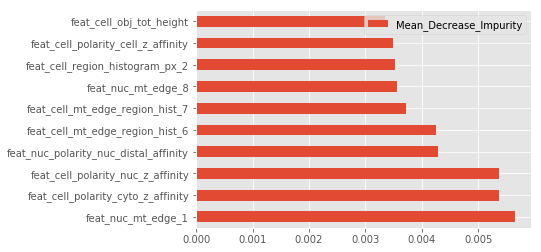

In [26]:
feat_scores = pd.DataFrame({'Mean_Decrease_Impurity' : model_gbc_xgboost.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Mean_Decrease_Impurity', ascending=False)

# Plot the feature importance: mean decrease in impurity
feat_scores[0:10].plot(kind='barh')

In [28]:
y_factorize = pd.factorize(y)

In [85]:
color_arr=np.array(["#B933FF","#33FDFF","#33FF7A","#0030D6","magenta","yellow","black","red","green","#6108A4","#BED500"])

legend_elements = []
for i in range(len(color_arr)):
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=y_factorize[1][i], markerfacecolor=color_arr[i], markersize=10))

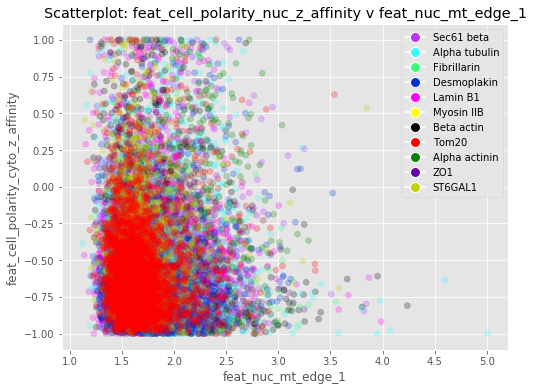

In [90]:
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.scatter(df['feat_nuc_mt_edge_1'], df['feat_cell_polarity_cyto_z_affinity'], 
           color=color_arr[y_factorize[0]],
          alpha = 0.25)
ax.set_title("Scatterplot: feat_cell_polarity_nuc_z_affinity v feat_nuc_mt_edge_1")
ax.set_xlabel("feat_nuc_mt_edge_1")
ax.set_ylabel("feat_cell_polarity_cyto_z_affinity")
ax.legend(handles=legend_elements)
